In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib Inline

In [2]:
data = 'E:\\SIMPLILEARN\\KAGGLE\\Air_Pollution\\data.csv' 
with open(data) as f:
    print(f)
    
data = pd.read_csv(data, encoding='ISO-8859-1')

<_io.TextIOWrapper name='E:\\SIMPLILEARN\\KAGGLE\\Air_Pollution\\data.csv' mode='r' encoding='cp1252'>


In [3]:
# Extracting Tamil Nadu state data alone
df = data.query("state == 'Maharashtra'")

In [4]:
df.head(2)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
197237,53.0,5/2/1987,Maharashtra,Pune,Maharashtra Pollution Control Board,NaN,NaN,10.4,NaN,NaN,NaN,NaN,1987-02-05
197238,52.0,5/3/1987,Maharashtra,Pune,Maharashtra Pollution Control Board,Industrial,18.2,35.8,NaN,NaN,NaN,NaN,1987-03-05


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60384 entries, 197237 to 257620
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   stn_code                     42976 non-null  object 
 1   sampling_date                60384 non-null  object 
 2   state                        60384 non-null  object 
 3   location                     60384 non-null  object 
 4   agency                       41695 non-null  object 
 5   type                         60090 non-null  object 
 6   so2                          58322 non-null  float64
 7   no2                          59167 non-null  float64
 8   rspm                         55439 non-null  float64
 9   spm                          22345 non-null  float64
 10  location_monitoring_station  57529 non-null  object 
 11  pm2_5                        0 non-null      float64
 12  date                         60382 non-null  object 
dtypes: float64

In [6]:
df.isna().sum().sort_values()

sampling_date                      0
state                              0
location                           0
date                               2
type                             294
no2                             1217
so2                             2062
location_monitoring_station     2855
rspm                            4945
stn_code                       17408
agency                         18689
spm                            38039
pm2_5                          60384
dtype: int64

In [7]:
df.tail()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
257616,711.0,27-12-15,Maharashtra,Nagpur,Maharashtra State Pollution Control Board,"Residential, Rural and other Areas",12.0,48.0,134.0,NaN,"MPCB Office Premises, Civil Lines, Nagpur",NaN,2015-12-27
257617,711.0,28-12-15,Maharashtra,Nagpur,Maharashtra State Pollution Control Board,"Residential, Rural and other Areas",15.0,63.0,77.0,NaN,"MPCB Office Premises, Civil Lines, Nagpur",NaN,2015-12-28
257618,711.0,29-12-15,Maharashtra,Nagpur,Maharashtra State Pollution Control Board,"Residential, Rural and other Areas",11.0,33.0,51.0,NaN,"MPCB Office Premises, Civil Lines, Nagpur",NaN,2015-12-29
257619,711.0,30-12-15,Maharashtra,Nagpur,Maharashtra State Pollution Control Board,"Residential, Rural and other Areas",12.0,38.0,46.0,NaN,"MPCB Office Premises, Civil Lines, Nagpur",NaN,2015-12-30
257620,711.0,31-12-15,Maharashtra,Nagpur,Maharashtra State Pollution Control Board,"Residential, Rural and other Areas",12.0,38.0,51.0,NaN,"MPCB Office Premises, Civil Lines, Nagpur",NaN,2015-12-31


In [8]:
df.describe()

,so2,no2,rspm,spm,pm2_5
count,58322.000000,59167.000000,55439.000000,22345.000000,0.0
mean,17.366863,32.115370,101.479608,205.255823,NaN
std,13.541155,19.062558,61.460782,130.053447,NaN
min,0.000000,1.000000,1.000000,4.000000,NaN
25%,9.000000,18.000000,59.000000,114.000000,NaN
50%,14.000000,29.000000,90.000000,180.000000,NaN
75%,22.000000,41.000000,128.000000,265.000000,NaN
max,597.000000,640.000000,946.000000,1733.000000,NaN


In [9]:
df['type'].replace("Industrial Areas","Industrial",inplace=True)
df['type'].replace("Industrial Area","Industrial",inplace=True)
df['type'].replace("Residential and others","Residential",inplace=True)
df['type'].replace("Residential, Rural and other Areas","Residential",inplace=True)
df['type'].replace("Sensitive Areas", "Sensitive Area", inplace=True)

In [10]:
df['so2'].fillna(df['so2'].mean(), inplace=True)
df['no2'].fillna(df['no2'].mean(), inplace=True)

In [11]:
df['rspm'].fillna(df['rspm'].median(),inplace = True)
df['spm'].fillna(df['spm'].median(),inplace = True)

In [12]:
df['type']=df['type'].fillna(df['type'].mode()[0])

In [13]:
df.isna().sum()

stn_code                       17408
sampling_date                      0
state                              0
location                           0
agency                         18689
type                               0
so2                                0
no2                                0
rspm                               0
spm                                0
location_monitoring_station     2855
pm2_5                          60384
date                               2
dtype: int64

In [14]:
df = df.sort_values(by='date')

In [15]:
df['date'].ffill(inplace=True)

In [16]:
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')

Dropping Columns like location_monitoring_station, pm2_5, date, Agency and stn_code

In [17]:
df.drop(columns=['location_monitoring_station', 'pm2_5', 'sampling_date', 'agency', 'stn_code'], inplace=True)

In [18]:
df.head()

,state,location,type,so2,no2,rspm,spm,date
197243,Maharashtra,Pune,Residential,8.100000,9.0,90.0,180.0,1987-01-07
197244,Maharashtra,Pune,Residential,0.700000,47.6,90.0,293.0,1987-01-12
197237,Maharashtra,Pune,Residential,17.366863,10.4,90.0,180.0,1987-02-05
197239,Maharashtra,Pune,Industrial,11.300000,16.3,90.0,180.0,1987-02-06
197242,Maharashtra,Pune,Industrial,9.700000,10.9,90.0,180.0,1987-02-07


# Exploratory Data Analysis

Text(0, 0.5, 'SO2 & NO2')

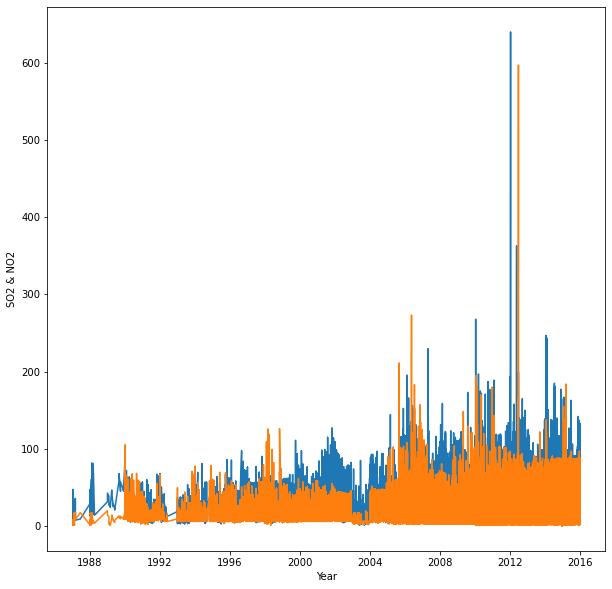

In [19]:
plt.figure(figsize=(10,10))
plt.plot(df['date'], df[['no2', 'so2']])
plt.xlabel("Year")
plt.ylabel("SO2 & NO2")

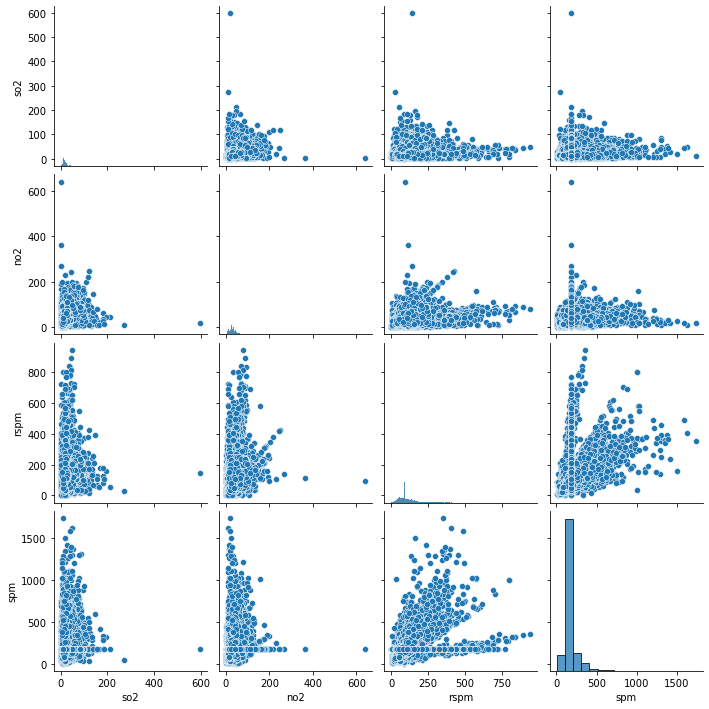

In [20]:
sns.pairplot(data=df)

Text(0, 0.5, 'RSPM & SPM')

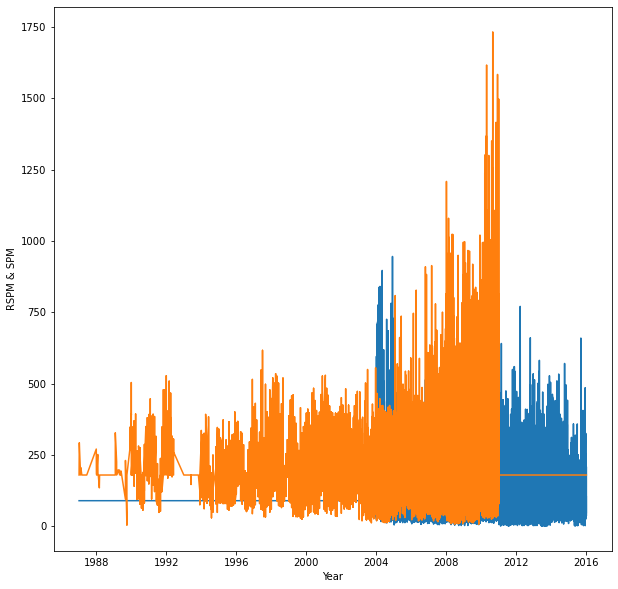

In [21]:
plt.figure(figsize=(10,10))
plt.plot(df['date'], df[['rspm', 'spm']])
plt.xlabel("Year")
plt.ylabel("RSPM & SPM")

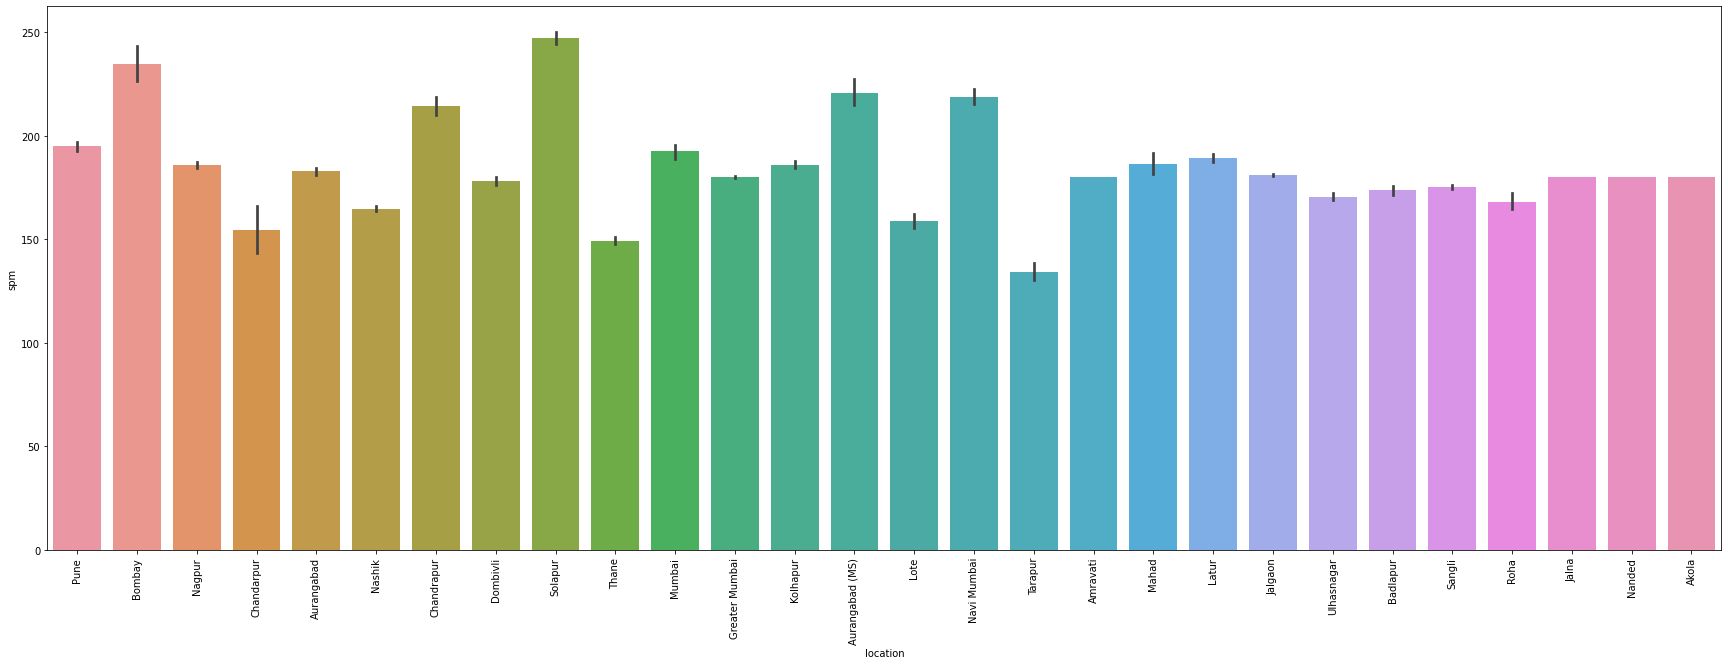

In [22]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='location',y='spm',data=df);

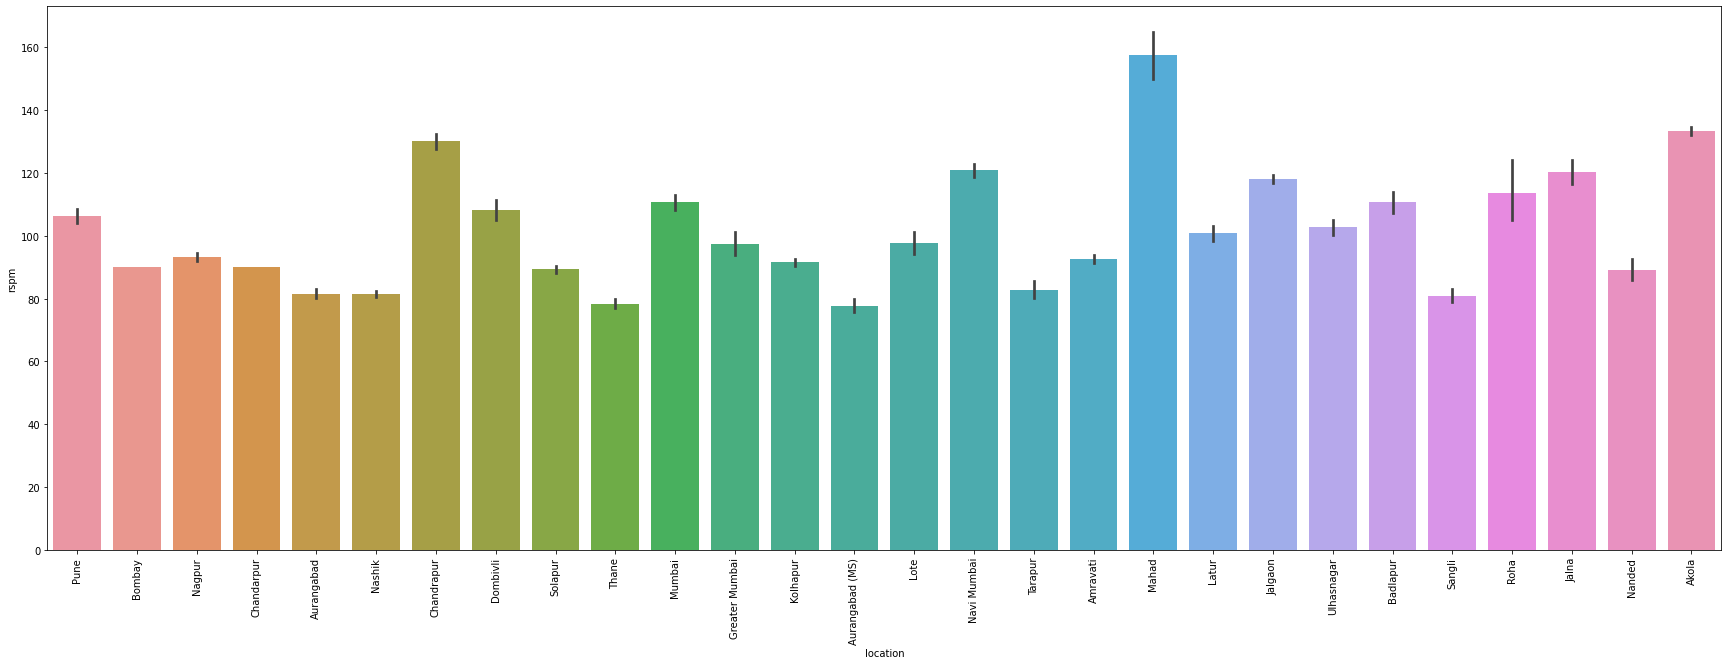

In [23]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='location',y='rspm',data=df);

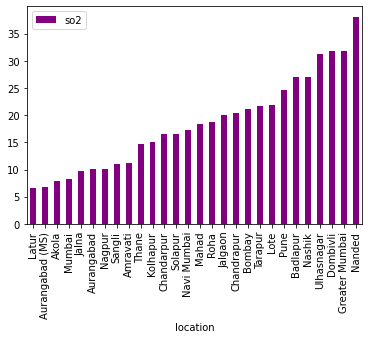

In [24]:
df[['so2','location']].groupby(["location"]).mean().sort_values(by='so2').plot.bar(color='purple')
plt.show()

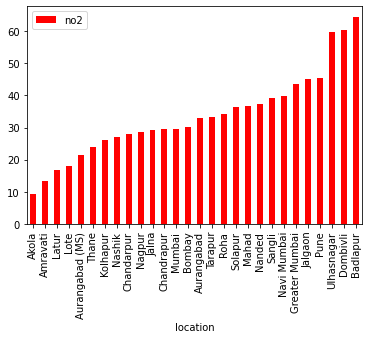

In [25]:
df[['no2','location']].groupby(["location"]).mean().sort_values(by='no2').plot.bar(color='red')
plt.show()

In [26]:
loc = pd.pivot_table(df, values=['so2','no2','spm'],index='location')
loc

,no2,so2,spm
location,,,
Akola,9.357824,7.937023,180.000000
Amravati,13.380021,11.138559,180.000000
Aurangabad,33.018726,10.016638,182.865231
Aurangabad (MS),21.351419,6.815767,220.934524
Badlapur,64.451282,27.041370,173.935043
Bombay,30.061229,21.169740,234.602837
Chandarpur,27.834365,16.567540,154.779221
Chandrapur,29.483155,20.313778,214.248013
Dombivli,60.499191,31.839702,178.267231


# Air Quality index

In [27]:
# Calculate so2
def calculate_si(so2):
    si=0
    if (so2<=40):
     si= "s1"
    if (so2>40 and so2<=80):
     si= "s2"
    if (so2>80 and so2<=380):
     si= "s3"
    if (so2>380 and so2<=800):
     si= "s4"
    if (so2>800 and so2<=1600):
     si= "s5"
    if (so2>1600):
     si= "s6"
    return si
df['si']= df['so2'].apply(calculate_si)
ds= df[['so2','si']]

In [28]:
# Calculate No2
def calculate_ni(no2):
    ni=0
    if (no2<=40):
     ni= "n1"
    if (no2>40 and no2<=80):
     ni= "n2"
    if (no2>80 and no2<=180):
     ni= "n3"
    if (no2>180 and no2<=280):
     ni= "n4"
    if (no2>280 and no2<=400):
     ni= "n5"
    if (no2>400):
     ni= "n6"
    return ni
df['ni']= df['no2'].apply(calculate_ni)
dn= df[['no2','ni']]

In [29]:
# Calculate SPM
def calculate_spi(spm):
    spi=0
    if (spm<=40):
      spi= "sp1"
    if (spm>40 and spm<=80):
      spi= "sp2"
    if (spm>80 and spm<=180):
      spi= "sp3"
    if (spm>180 and spm<=280):
      spi= "sp4"
    if (spm>280 and spm<=400):
      spi= "sp5"
    if (spm>400):
      spi= "sp6"
    return  spi
df['spi']= df['spm'].apply(calculate_spi)
dsp= df[['spm','spi']]

In [30]:
# Calculate AQI 
def calculate_aqi(si,ni,spi):
    aqi=0
    if(si>ni and si>spi):
     aqi=si
    if (spi>ni and spi>si):
     aqi=spi
    if(ni>si and ni>spi):
     aqi= ni
    return aqi
df['AQI']= df.apply(lambda x:calculate_aqi(x['so2'],x['no2'],x['spm']),axis=1)

In [31]:
df.head(3)

,state,location,type,so2,no2,rspm,spm,date,si,ni,spi,AQI
197243,Maharashtra,Pune,Residential,8.100000,9.0,90.0,180.0,1987-01-07,s1,n1,sp3,180.0
197244,Maharashtra,Pune,Residential,0.700000,47.6,90.0,293.0,1987-01-12,s1,n2,sp5,293.0
197237,Maharashtra,Pune,Residential,17.366863,10.4,90.0,180.0,1987-02-05,s1,n1,sp3,180.0


In [32]:
df['year'] = df['date'].dt.year

In [33]:
df['month'] = df['date'].dt.month

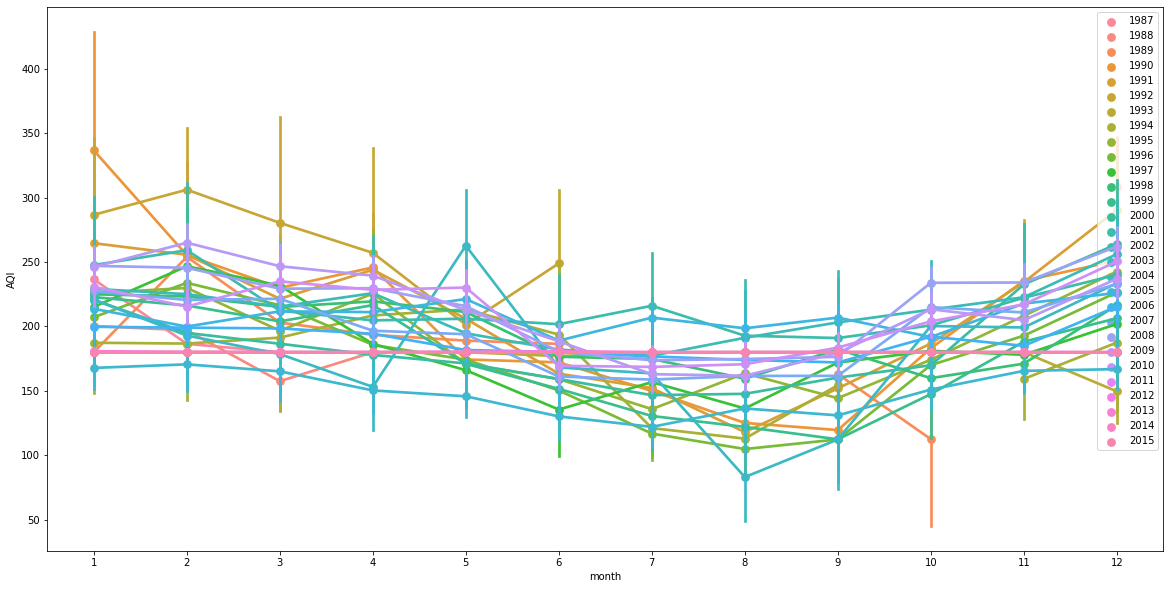

In [74]:
plt.figure(figsize=(20, 10))
sns.pointplot(x="month", y='AQI', hue="year", data=df )
plt.xlabel("month")
plt.ylabel('AQI')
plt.legend(loc='upper right')

In [35]:
df.head()

,state,location,type,so2,no2,rspm,spm,date,si,ni,spi,AQI,year,month
197243,Maharashtra,Pune,Residential,8.100000,9.0,90.0,180.0,1987-01-07,s1,n1,sp3,180.0,1987,1
197244,Maharashtra,Pune,Residential,0.700000,47.6,90.0,293.0,1987-01-12,s1,n2,sp5,293.0,1987,1
197237,Maharashtra,Pune,Residential,17.366863,10.4,90.0,180.0,1987-02-05,s1,n1,sp3,180.0,1987,2
197239,Maharashtra,Pune,Industrial,11.300000,16.3,90.0,180.0,1987-02-06,s1,n1,sp3,180.0,1987,2
197242,Maharashtra,Pune,Industrial,9.700000,10.9,90.0,180.0,1987-02-07,s1,n1,sp3,180.0,1987,2


In [76]:
# Decomposing to see white noiise
decompose = pd.pivot_table(df, values=['AQI'],index='location')
decompose.head()

,AQI
location,
Akola,180.000000
Amravati,180.000000
Aurangabad,182.865231
Aurangabad (MS),220.934524
Badlapur,173.935043


# Importing Decomposition model and plotting graph
## Trend, Sesonality & Residual

In [77]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(decompose, model='additive', period=12, extrapolate_trend=12)

In [78]:
trend = decomposition.trend
sesonal = decomposition.seasonal
resid = decomposition.resid

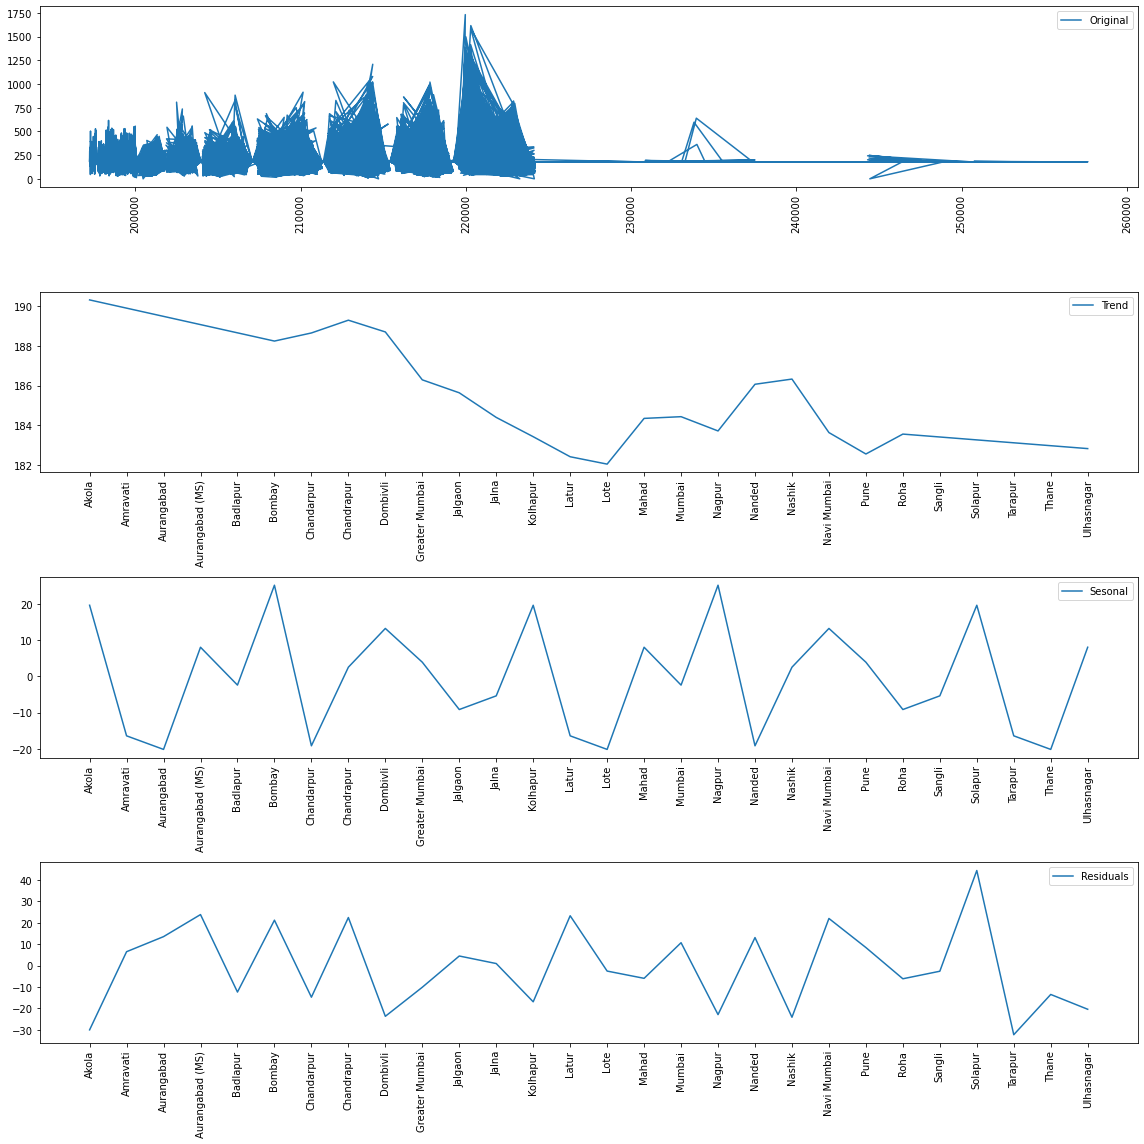

In [82]:
plt.figure(figsize=(16,16))

plt.subplot(411)
plt.plot(df['AQI'], label='Original')
plt.xticks(rotation ='vertical')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.xticks(rotation ='vertical')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(sesonal, label='Sesonal')
plt.xticks(rotation ='vertical')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(resid, label='Residuals')
plt.xticks(rotation ='vertical')
plt.legend(loc='best')

plt.tight_layout()

## AutoCorrelation

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

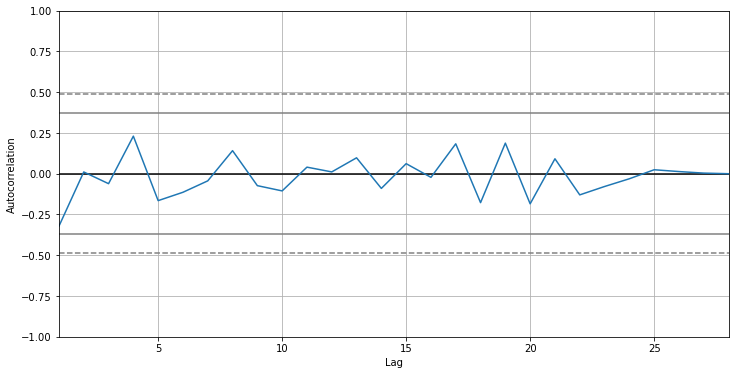

In [83]:
# Plotting Graph for autocorelation
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(12,6))
autocorrelation_plot(decompose)

### Importing data 

In [42]:
import datetime as dt
import math
from sklearn.metrics import mean_squared_error

In [89]:
ts = pd.pivot_table(df, values=['AQI'],index='location')
ts.head()
ts.shape

(28, 1)

In [90]:
# training Data and testing data
x_train = ts[:20]
x_test = ts[20:]
print(x_train.shape)
print(x_test.shape)

(20, 1)
(8, 1)


## Stationarity Check
For stationarity  check we will use Augmented Dicky Fuller Test

In [93]:
from statsmodels.tsa.stattools import adfuller

def stationarity_check(data):
    df_test = adfuller(data.AQI, autolag='AIC')
    df_output = pd.Series(df_test[0:4], index= ['Test Static: ', 'P-Value: ','#Lags Used :','No. Of Observation :' ])
    for key,value in df_test[4].items():
        df_output['Criticat Value (%s)'%key] = value
    print(df_output)
    
    plt.figure(figsize=(10,6))
    plt.plot(data.index, data.AQI)
    plt.xticks(rotation ='vertical')
    plt.show()
    

Test Static:            -3.468397
P-Value:                 0.008837
#Lags Used :             6.000000
No. Of Observation :    13.000000
Criticat Value (1%)     -4.068854
Criticat Value (5%)     -3.127149
Criticat Value (10%)    -2.701730
dtype: float64


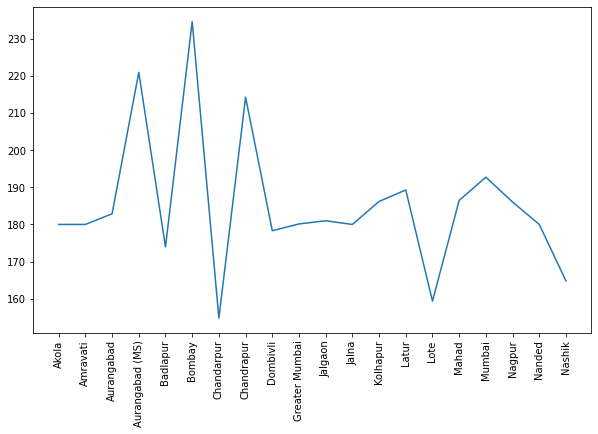

In [94]:
stationarity_check(x_train)

* Data is Highly stationary
* we need to apply log transformation to make variance constant

In [95]:
log_train = x_train
log_train = log_train['AQI'].apply(lambda x : math.log(x+1))
log_train = pd.DataFrame(log_train)


Test Static:            -3.208069
P-Value:                 0.019522
#Lags Used :             6.000000
No. Of Observation :    13.000000
Criticat Value (1%)     -4.068854
Criticat Value (5%)     -3.127149
Criticat Value (10%)    -2.701730
dtype: float64


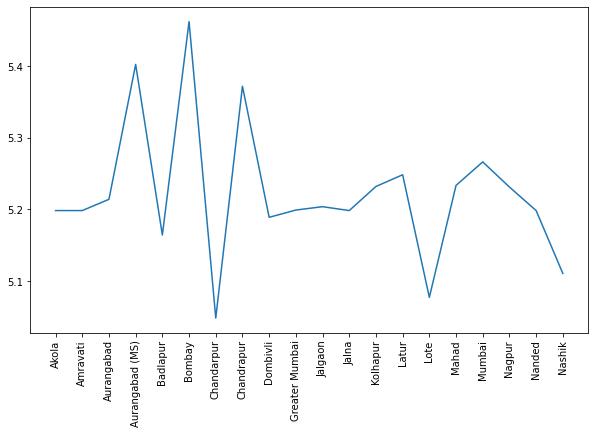

In [96]:
stationarity_check(log_train)

In [97]:
first_diff = log_train['AQI'] - log_train['AQI'].shift(1)
first_diff = first_diff.fillna(0)
first_diff = pd.DataFrame(first_diff)

Test Static:            -0.008599
P-Value:                 0.957815
#Lags Used :             8.000000
No. Of Observation :    11.000000
Criticat Value (1%)     -4.223238
Criticat Value (5%)     -3.189369
Criticat Value (10%)    -2.729839
dtype: float64


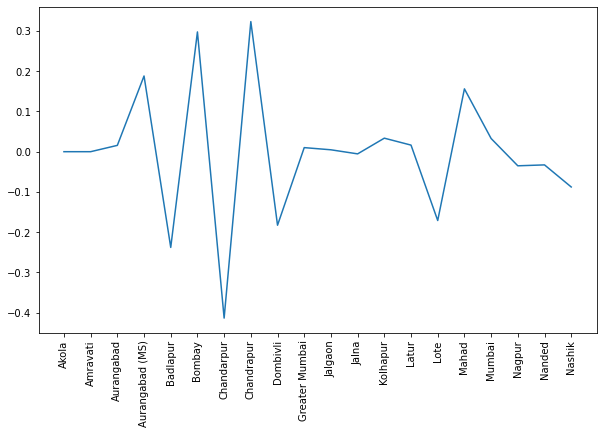

In [98]:
stationarity_check(first_diff)

In [99]:
# Using Sesonality Difference
seasonal_diff = log_train['AQI'] - log_train['AQI'].shift(12)
seasonal_diff = seasonal_diff.fillna(0)
seasonal_diff = pd.DataFrame(seasonal_diff)

Test Static:            -2.140179
P-Value:                 0.228668
#Lags Used :             7.000000
No. Of Observation :    12.000000
Criticat Value (1%)     -4.137829
Criticat Value (5%)     -3.154972
Criticat Value (10%)    -2.714477
dtype: float64


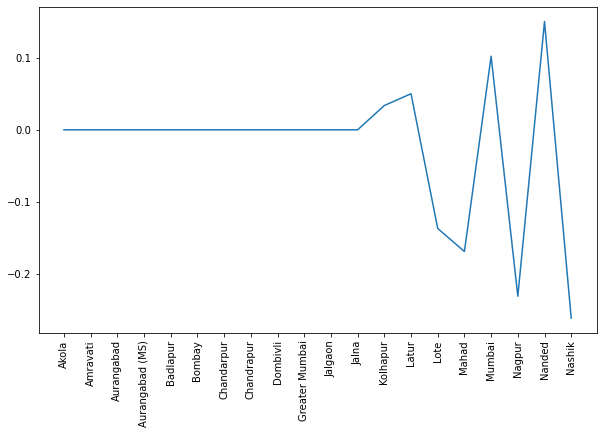

In [100]:
stationarity_check(seasonal_diff)

### Plotting Acf and Pacf plots:

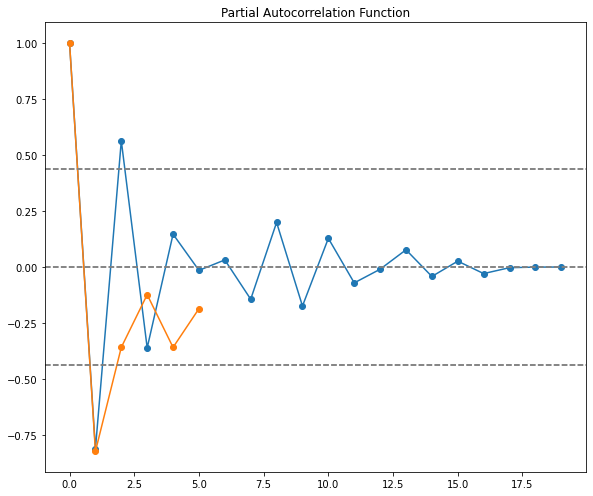

In [103]:
from statsmodels.tsa.stattools import acf, pacf
lag_Acf = acf(first_diff, nlags=120)
lag_Pacf = pacf(first_diff, nlags=5, method='ols')
plt.figure(figsize=(16,7))

# ACF Plot
plt.subplot(121)
plt.plot(lag_Acf, marker='o')
plt.axhline(y=0, linestyle='--', color='grey')
plt.axhline(y=-1.96/np.sqrt(len(first_diff)), linestyle='--', color='grey')
plt.axhline(y=1.96/np.sqrt(len(first_diff)), linestyle='--', color='grey')
plt.title("Autocorrelation Function")

# PACF Plot
plt.subplot(121)
plt.plot(lag_Pacf, marker='o')
plt.axhline(y=0, linestyle='--', color='grey')
plt.axhline(y=-1.96/np.sqrt(len(first_diff)), linestyle='--', color='grey')
plt.axhline(y=1.96/np.sqrt(len(first_diff)), linestyle='--', color='grey')
plt.title("Partial Autocorrelation Function")

plt.tight_layout()

## Auto ARIMA Model

In [104]:
import warnings
warnings.filterwarnings('ignore')

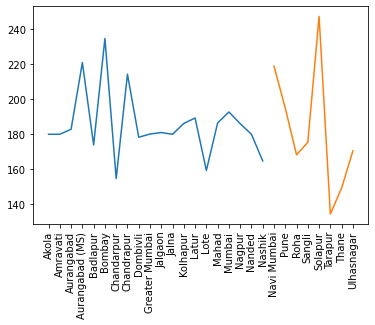

In [107]:
plt.plot(x_train)
plt.xticks(rotation ='vertical')
plt.plot(x_test)


In [108]:
from pmdarima import auto_arima

model = auto_arima(x_train.values, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   #  Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=1.29 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=203.073, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=178.491, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=170.474, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=171.854, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=172.039, Time=0.05 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.763 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   20
Model:               SARIMAX(2, 2, 0)   Log Likelihood                 -82.237
Date:                Sat, 19 Nov 2022   AIC                            170

* We have seen that the best model is SARIMAX

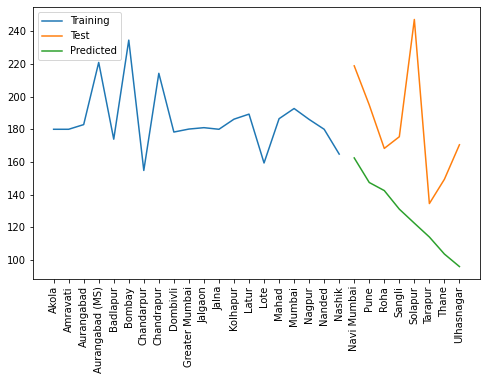

In [110]:
prediction = pd.DataFrame(model.predict(n_periods=len(x_test)),index=x_test.index)
prediction.columns = ['predicted_AQI']
plt.figure(figsize=(8,5))
plt.plot(x_train,label="Training")
plt.plot(x_test,label="Test")
plt.xticks(rotation ='vertical')
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'upper left')
plt.savefig('SecondPrection.jpg')
plt.show()